Training Feed-Forward Neural Network on XOR Problem

Epoch 100/5000, Loss: 0.693147
Epoch 200/5000, Loss: 0.693147
Epoch 300/5000, Loss: 0.693147
Epoch 400/5000, Loss: 0.693147
Epoch 500/5000, Loss: 0.693147
Epoch 600/5000, Loss: 0.693147
Epoch 700/5000, Loss: 0.693147
Epoch 800/5000, Loss: 0.693147
Epoch 900/5000, Loss: 0.693147
Epoch 1000/5000, Loss: 0.693147
Epoch 1100/5000, Loss: 0.693147
Epoch 1200/5000, Loss: 0.693147
Epoch 1300/5000, Loss: 0.693147
Epoch 1400/5000, Loss: 0.693147
Epoch 1500/5000, Loss: 0.693147
Epoch 1600/5000, Loss: 0.693147
Epoch 1700/5000, Loss: 0.693147
Epoch 1800/5000, Loss: 0.693147
Epoch 1900/5000, Loss: 0.693147
Epoch 2000/5000, Loss: 0.693147
Epoch 2100/5000, Loss: 0.693147
Epoch 2200/5000, Loss: 0.693147
Epoch 2300/5000, Loss: 0.693147
Epoch 2400/5000, Loss: 0.693147
Epoch 2500/5000, Loss: 0.693147
Epoch 2600/5000, Loss: 0.693147
Epoch 2700/5000, Loss: 0.693147
Epoch 2800/5000, Loss: 0.693147
Epoch 2900/5000, Loss: 0.693147
Epoch 3000/5000, Loss: 0.693

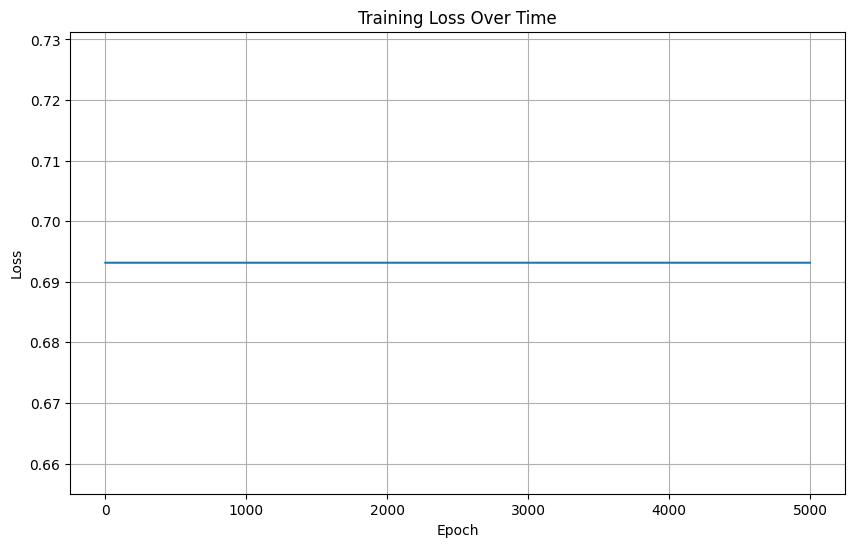

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class FeedForwardNN:
    def __init__(self, layers, learning_rate=0.01):
        """
        Initialize a feed-forward neural network.

        Args:
            layers: List of integers representing the number of neurons in each layer
                   e.g., [2, 4, 3, 1] means 2 input neurons, two hidden layers with 4 and 3 neurons, 1 output
            learning_rate: Learning rate for gradient descent
        """
        self.layers = layers
        self.lr = learning_rate
        self.num_layers = len(layers)

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        for i in range(self.num_layers - 1):
            # He initialization for weights
            w = np.random.randn(layers[i], layers[i+1]) * np.sqrt(2.0 / layers[i])
            b = np.zeros((1, layers[i+1]))
            self.weights.append(w)
            self.biases.append(b)

    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def sigmoid_derivative(self, z):
        """Derivative of sigmoid function"""
        return z * (1 - z)

    def relu(self, z):
        """ReLU activation function"""
        return np.maximum(0, z)

    def relu_derivative(self, z):
        """Derivative of ReLU function"""
        return (z > 0).astype(float)

    def forward_propagation(self, X):
        """
        Perform forward propagation through the network.

        Args:
            X: Input data of shape (batch_size, input_features)

        Returns:
            activations: List of activations for each layer
        """
        activations = [X]

        for i in range(self.num_layers - 1):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]

            # Use ReLU for hidden layers, sigmoid for output layer
            if i < self.num_layers - 2:
                a = self.relu(z)
            else:
                a = self.sigmoid(z)

            activations.append(a)

        return activations

    def backward_propagation(self, X, y, activations):
        """
        Perform backward propagation to compute gradients.

        Args:
            X: Input data
            y: True labels
            activations: List of activations from forward propagation

        Returns:
            weight_gradients: List of gradients for weights
            bias_gradients: List of gradients for biases
        """
        m = X.shape[0]  # batch size
        weight_gradients = []
        bias_gradients = []

        # Compute output layer error
        delta = activations[-1] - y

        # Backpropagate through layers
        for i in range(self.num_layers - 2, -1, -1):
            # Compute gradients
            dw = np.dot(activations[i].T, delta) / m
            db = np.sum(delta, axis=0, keepdims=True) / m

            weight_gradients.insert(0, dw)
            bias_gradients.insert(0, db)

            # Propagate error to previous layer
            if i > 0:
                delta = np.dot(delta, self.weights[i].T)
                delta = delta * self.relu_derivative(activations[i])

        return weight_gradients, bias_gradients

    def update_parameters(self, weight_gradients, bias_gradients):
        """Update weights and biases using gradient descent"""
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * weight_gradients[i]
            self.biases[i] -= self.lr * bias_gradients[i]

    def compute_loss(self, y_true, y_pred):
        """Compute binary cross-entropy loss"""
        m = y_true.shape[0]
        epsilon = 1e-8  # For numerical stability
        loss = -np.mean(y_true * np.log(y_pred + epsilon) +
                       (1 - y_true) * np.log(1 - y_pred + epsilon))
        return loss

    def train(self, X, y, epochs=1000, verbose=True):
        """
        Train the neural network.

        Args:
            X: Training data of shape (num_samples, input_features)
            y: Labels of shape (num_samples, output_features)
            epochs: Number of training epochs
            verbose: Whether to print training progress

        Returns:
            losses: List of losses over epochs
        """
        losses = []

        for epoch in range(epochs):
            # Forward propagation
            activations = self.forward_propagation(X)

            # Compute loss
            loss = self.compute_loss(y, activations[-1])
            losses.append(loss)

            # Backward propagation
            weight_gradients, bias_gradients = self.backward_propagation(X, y, activations)

            # Update parameters
            self.update_parameters(weight_gradients, bias_gradients)

            # Print progress
            if verbose and (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.6f}")

        return losses

    def predict(self, X):
        """Make predictions on new data"""
        activations = self.forward_propagation(X)
        return activations[-1]


# Example: Training on XOR problem
if __name__ == "__main__":
    # Generate XOR dataset
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    y = np.array([[0],
                  [1],
                  [1],
                  [0]])

    # Create and train the network
    # Architecture: 2 inputs -> 4 hidden neurons -> 4 hidden neurons -> 1 output
    nn = FeedForwardNN(layers=[2, 4, 4, 1], learning_rate=0.1)

    print("Training Feed-Forward Neural Network on XOR Problem\n")
    losses = nn.train(X, y, epochs=5000, verbose=True)

    # Make predictions
    print("\n--- Predictions ---")
    predictions = nn.predict(X)
    for i in range(len(X)):
        print(f"Input: {X[i]}, Predicted: {predictions[i][0]:.4f}, True: {y[i][0]}")

    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()